# EDA

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv


import model.train as train
import model.config as config
import utils as utils
import model.dataset.game_matchup as ds_games_matchup
from pandas_profiling import ProfileReport
from yellowbrick.target import FeatureCorrelation

sns.set()
%matplotlib inline

#pd.options.display.max_columns = None
#pd.set_option("display.max_colwidth", None)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_columns", 100)

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load dataset

In [2]:
dataset = ds_games_matchup.load_game_matchup_dataset()

In [3]:
df = dataset[config.X_columns + config.y_columns]

In [4]:
print(len(df))
seasons = df.SEASON.unique()[-10:]
seasons

18209


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

Trabajaremos solo con las ultimas 10 temporadas

In [5]:
df = df[df.SEASON.isin(seasons)]

## Checking null value

In [6]:
df.isnull().sum().sum()

0

Se observa que no existen valores nulos.

## Unique enteries in each of the columns

In [7]:
df.nunique()

SEASON                     10
HT_RANK                    30
HT_CLASS                    3
HT_HW                      45
HT_HL                      40
HT_VW                      38
HT_VL                      43
HT_LAST10_W                11
HT_LAST10_L                11
HT_LAST10_MATCHUP_W        11
HT_LAST10_MATCHUP_L        11
HT_OVERALL_OFF_POINTS    8167
HT_OVERALL_DEF_POINTS    8055
HT_OVERALL_OFF_FG         121
HT_OVERALL_DEF_FG         106
HT_OVERALL_OFF_3P         188
HT_OVERALL_DEF_3P         172
HT_OVERALL_OFF_FT         216
HT_OVERALL_DEF_FT         146
HT_OVERALL_OFF_REB       5539
HT_OVERALL_DEF_REB       5431
HT_AWAY_POINTS           3914
HT_AWAY_FG                130
HT_AWAY_3P                203
HT_AWAY_FT                238
HT_AWAY_REB              2811
VT_RANK                    30
VT_CLASS                    3
VT_HW                      46
VT_HL                      39
VT_VW                      39
VT_VL                      44
VT_LAST10_W                11
VT_LAST10_

## Features  correlations

In [8]:
def plot_heatmap(data, title):
    plt.figure(figsize = (30, 24))
    heatmap = sns.heatmap(data,
            linewidth=1,
            annot=True,
            annot_kws={'size' : 10} )
    plt.title(title, fontsize=25)
    plt.show()
    return heatmap

def save_heatmap(heatmap, name):
    figure = heatmap.get_figure()    
    figure.savefig(f'plots/{name}.png')

In [9]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

### Pearson Correlations

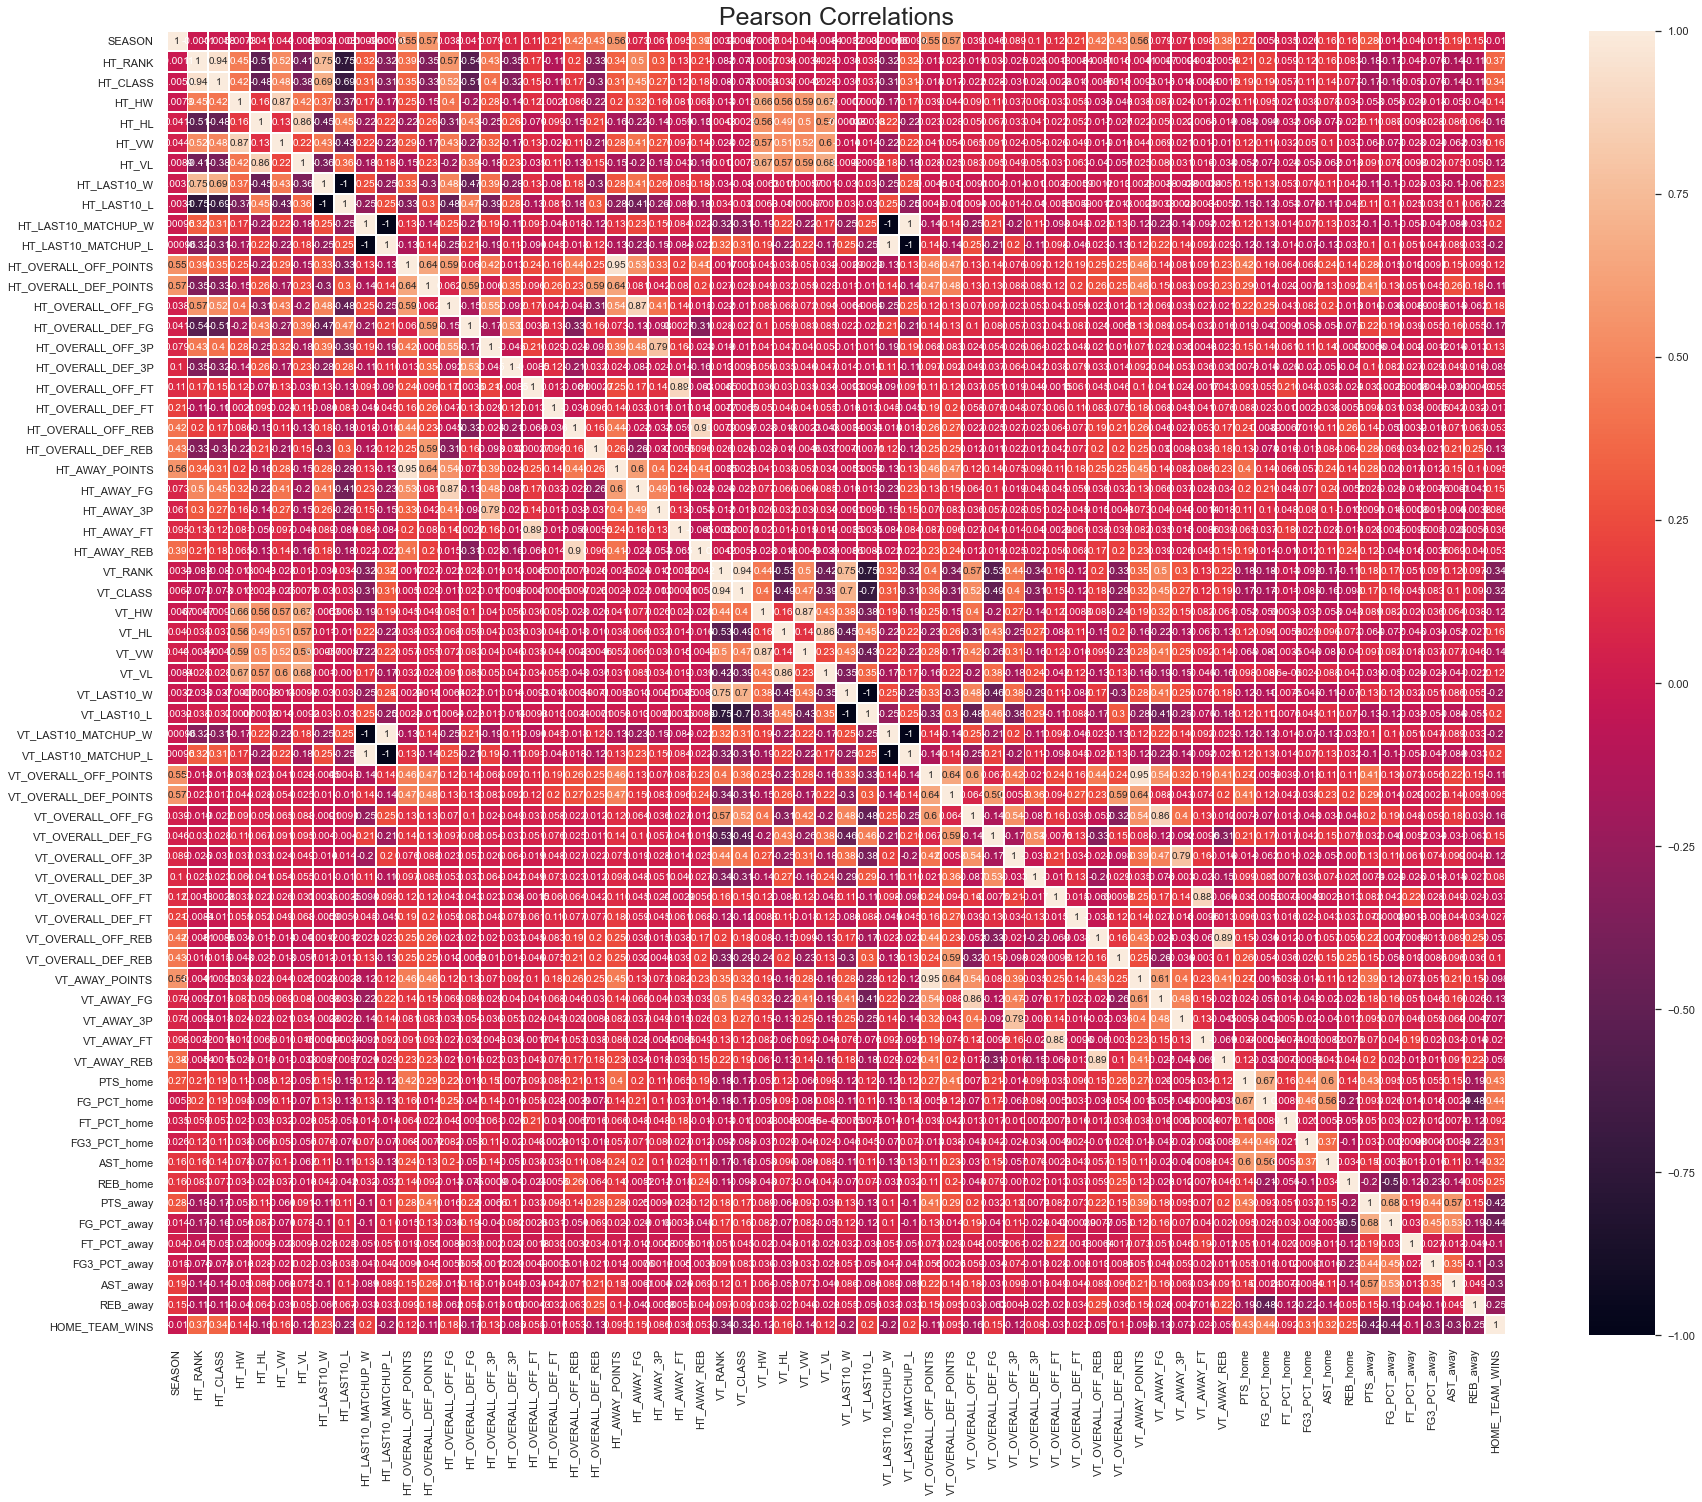

In [10]:
save_heatmap(plot_heatmap(pearson_corr, "Pearson Correlations"), "pearson_corr")

### Spearman Correlation

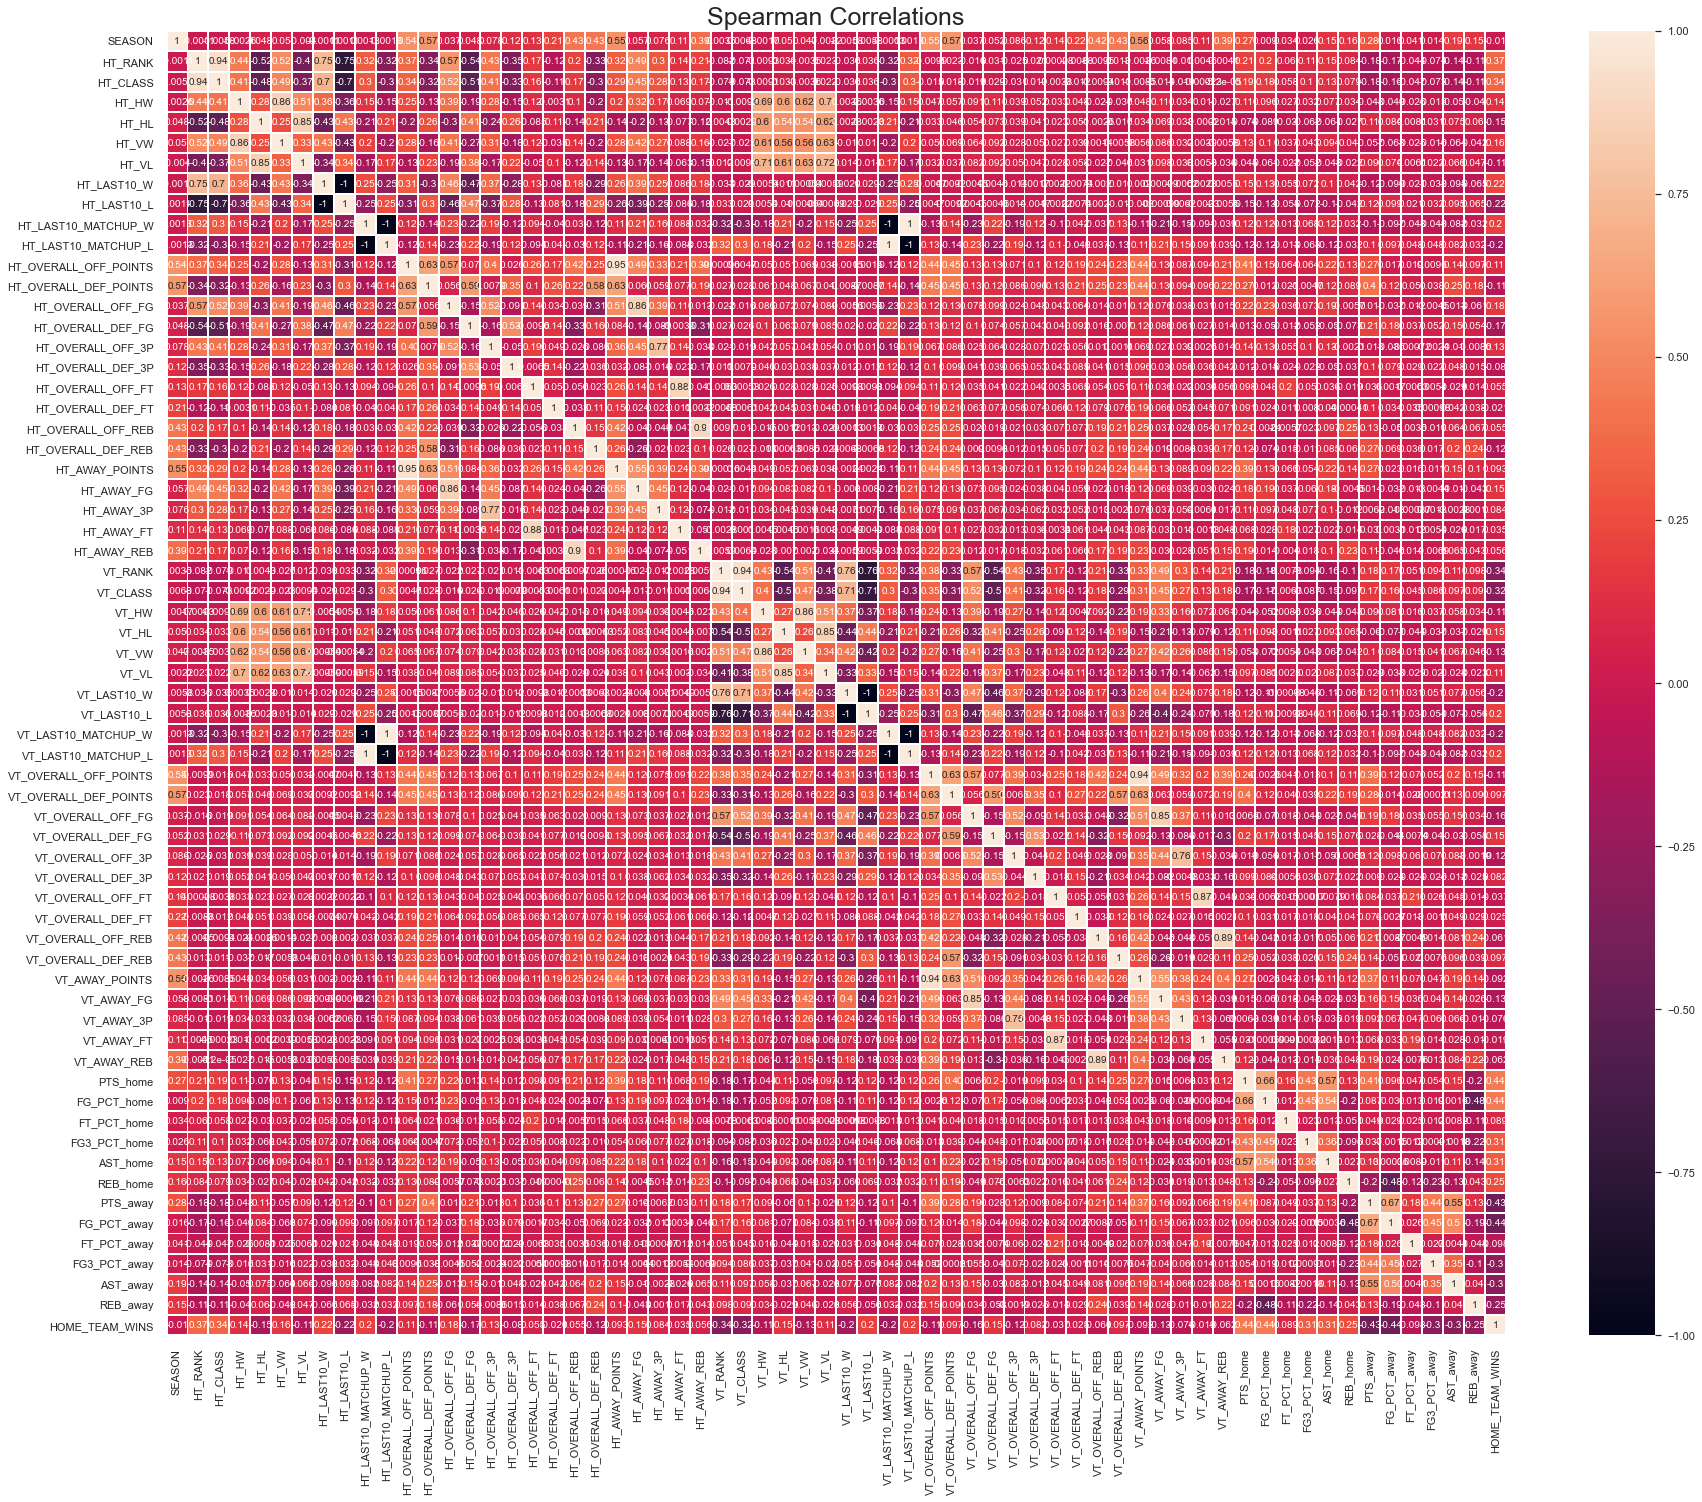

In [11]:
save_heatmap(plot_heatmap(spearman_corr, "Spearman Correlations"), "spearman_corr")

### __Kendall correlation__

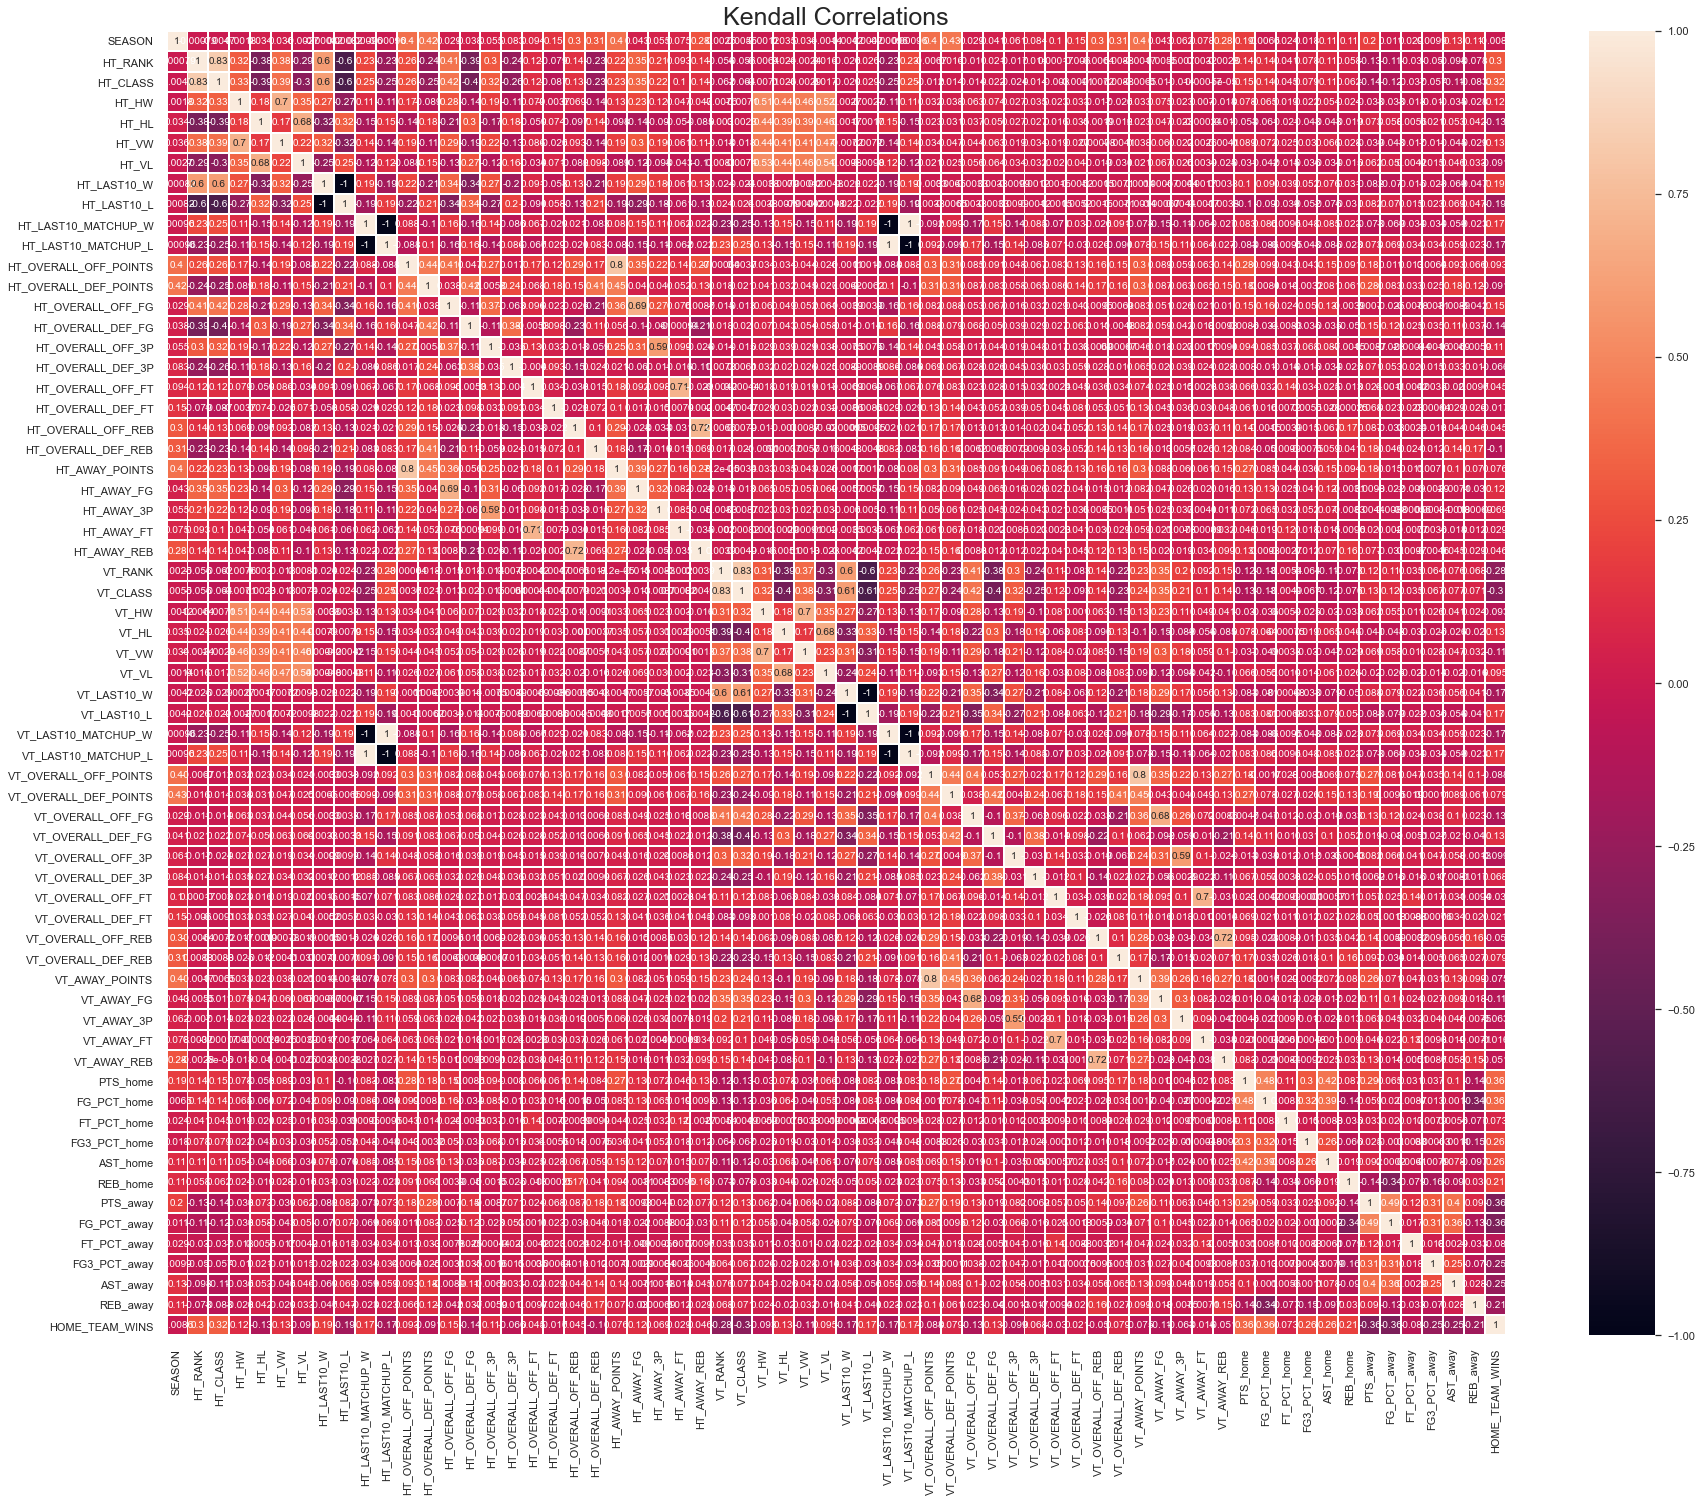

In [12]:
save_heatmap(plot_heatmap(kendall_corr, "Kendall Correlations"), "kendall_corr")

In [13]:
profile = ProfileReport(df, title='Pandas Profiling Report', pool_size=4,
                        minimal=True,
                        explorative=True,
                           correlations={
             "pearson": {"calculate": True},
             "spearman": {"calculate": True},
             "kendall": {"calculate": True},
             "phi_k": {"calculate": False},
             "cramers": {"calculate": False},
         })

In [14]:
profile.to_file("plots/eda.html")
profile

In [15]:
#analyzing the dataset
report = sv.analyze(df)
#display the report
report.show_html('plots/eda_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:22  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report plots/eda_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Visualize the correlation of the dependent variable with the features

In [16]:
#target = df[config.y_columns]
target = df["HOME_TEAM_WINS"]
features = df.drop(config.y_columns, axis=1)

### Drop categorical values

In [17]:
features.drop(["HT_RANK", "HT_CLASS", "VT_RANK", "VT_CLASS"], axis=1, inplace=True)

In [18]:
features_names = list(features.columns)

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


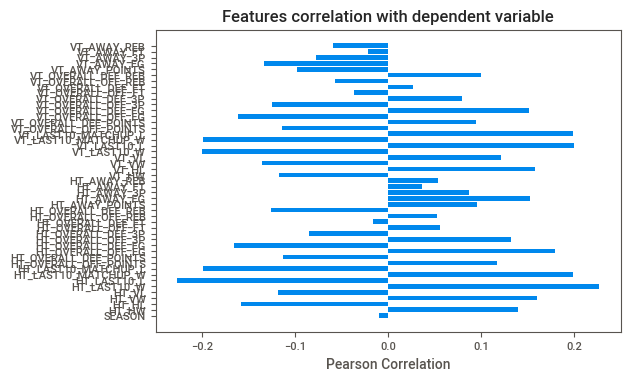

In [19]:
visualizer = FeatureCorrelation(labels=features_names)
visualizer.fit(features, target)
visualizer.poof()